<a href="https://colab.research.google.com/github/Antekba/Uczenie-maszynowe/blob/main/Zadanie10_AB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/spark-3.5.1/spark-3.5.1-bin-hadoop3.tgz
!tar xf spark-3.5.1-bin-hadoop3.tgz
!pip install -q findspark==1.3.0

In [9]:
!pip install -q pyspark==3.5.1

In [10]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.5.1-bin-hadoop3"

In [18]:
# Importowanie niezbędnych bibliotek
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime
import matplotlib.pyplot as plt

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
!unzip data.zip

Archive:  data.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
   creating: data/shot_charts_top_10/
   creating: data/shot_charts_top_10/2013/
  inflating: data/shot_charts_top_10/2013/nba_savant201933.csv  
  inflating: data/shot_charts_top_10/2013/nba_savant2736.csv  
  inflating: data/shot_charts_top_10/2013/nba_savant101145.csv  
  inflating: data/shot_charts_top_10/2013/nba_savant200746.csv  
  inflating: data/shot_charts_top_10/2013/nba_savant200752.csv  
  inflating: data/shot_charts_top_10/2013/nba_savant201935.csv  
  inflating: data/shot_charts_top_10/2013/nba_savant101135.csv  
  inflating: data/shot_charts_top_10/2013/nba_savant202691.csv  
  inflating: data/shot_charts_top_10/2013/nba_savant201950.csv  
  inflating: data/shot_charts_top_10/2013/nba_savant202323.csv  
  inflating: data/shot_charts_top_10/2013/nba_savant201564.csv  
  inflating: data/shot_charts_top_10/2

In [27]:
df = spark.read.option('header','true')\
          .option('inferSchema','true')\
          .csv('data/season_totals.csv')

In [28]:
!ls

data	  drive     sample_data		     spark-3.5.1-bin-hadoop3.tgz
data.zip  __MACOSX  spark-3.5.1-bin-hadoop3  spark-3.5.1-bin-hadoop3.tgz.1


In [30]:
data = pd.read_csv('data/nba_savant.csv')

In [31]:

print(data.describe())


print(data.isnull().sum())


print(data.dtypes)

        season  espn_player_id       team_id  espn_game_id        period  \
count  50000.0    4.860600e+04  5.000000e+04  5.000000e+04  50000.000000   
mean    2016.0    9.924612e+05  1.610613e+09  3.870526e+08      2.480280   
std        0.0    1.382873e+06  8.661248e+00  7.320965e+07      1.119302   
min     2016.0    2.500000e+01  1.610613e+09  0.000000e+00      1.000000   
25%     2016.0    3.428000e+03  1.610613e+09  4.008995e+08      1.000000   
50%     2016.0    6.448000e+03  1.610613e+09  4.008996e+08      2.000000   
75%     2016.0    2.531047e+06  1.610613e+09  4.008998e+08      3.000000   
max     2016.0    4.064730e+06  1.610613e+09  4.008999e+08      4.000000   

       minutes_remaining  seconds_remaining  shot_made_flag  shot_distance  \
count       50000.000000       50000.000000    50000.000000    50000.00000   
mean            5.330620          28.713500        0.416880       14.44758   
std             3.454045          17.476905        0.493048       10.38892   
min

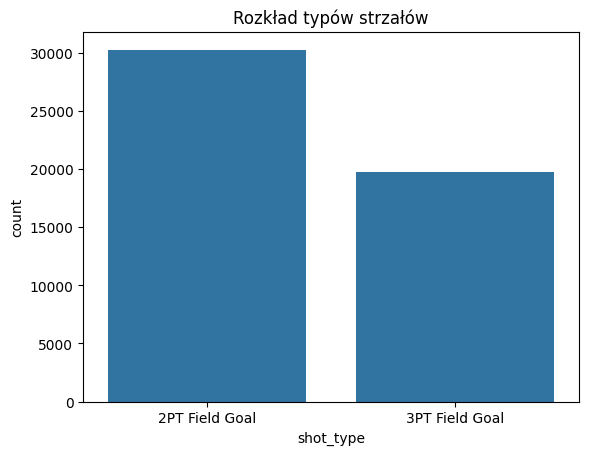

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Wykres liczby strzałów w zależności od typu strzału
sns.countplot(x='shot_type', data=data)
plt.title('Rozkład typów strzałów')
plt.show()

In [33]:
from sklearn.model_selection import train_test_split


data['shot_type'] = data['shot_type'].astype('category').cat.codes

# Podział danych na zbiory treningowe i testowe
X = data.drop('shot_made_flag', axis=1)
y = data['shot_made_flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data['game_date'] = pd.to_datetime(data['game_date'])
data['year'] = data['game_date'].dt.year



In [38]:

data['year'] = data['game_date'].dt.year


annual_shots = data.groupby('year').size().reset_index(name='total_shots')

In [39]:

annual_shots['year_ordinal'] = pd.to_datetime(annual_shots['year'], format='%Y').map(pd.Timestamp.toordinal)

In [40]:
print(data.columns)

Index(['name', 'team_name', 'game_date', 'season', 'espn_player_id', 'team_id',
       'espn_game_id', 'period', 'minutes_remaining', 'seconds_remaining',
       'shot_made_flag', 'action_type', 'shot_type', 'shot_distance',
       'opponent', 'x', 'y', 'dribbles', 'touch_time', 'defender_name',
       'defender_distance', 'shot_clock', 'year'],
      dtype='object')


In [41]:
import pandas as pd


data['year'] = data['game_date'].dt.year


annual_shots = data.groupby('year').size().reset_index(name='total_shots')


annual_shots['year_ordinal'] = pd.to_datetime(annual_shots['year'], format='%Y').map(pd.Timestamp.toordinal)


   year  total_shots  year_ordinal
0  2016        50000        735964


In [42]:
from sklearn.linear_model import LinearRegression

# Przygotowanie danych do modelowania
X = annual_shots[['year_ordinal']]
y = annual_shots['total_shots']

# Budowanie modelu regresji liniowej
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [43]:
# Predykcja dla roku 2022
year_2022_ordinal = pd.Timestamp('2022-01-01').toordinal()
predicted_shots_2022 = model.predict([[year_2022_ordinal]])

print(f"Przewidywana liczba strzałów na koniec 2022 roku: {predicted_shots_2022[0]}")

Przewidywana liczba strzałów na koniec 2022 roku: 50000.0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
